In [6]:
import pandas as pd
from pmdarima import auto_arima
import tool
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [7]:
train, test = tool.make_monthly_data('IndexPrices__US93.xlsx')

In [8]:
# Prophet using all available data
US93_train, US93_test = tool.data_process("IndexPrices__US93.xlsx")
US93_train.iloc[197,0]
US93_train = US93_train[198:].reset_index(drop=True)
US93_model_obj = Prophet()
US93_forecast = tool.make_forecast(US93_model_obj, US93_train)
tool.timeseries_evaluation_metrics_func(US93_train.y,US93_forecast[:len(US93_train)].yhat)


10:00:27 - cmdstanpy - INFO - Chain [1] start processing
10:00:28 - cmdstanpy - INFO - Chain [1] done processing


Evaluation metric results:-
MSE is : 349.73607335258254
MAE is : 12.75438664229529
RMSE is : 18.70123186724828
MAPE is : 0.19565047399317245
R2 is : 0.5673797429804355
Your model is not good enough. Please adjust it.


In [9]:
tool.timeseries_evaluation_metrics_func(US93_test.y,US93_forecast[len(US93_train):].yhat)

Evaluation metric results:-
MSE is : 1032.034516342208
MAE is : 28.209326553240615
RMSE is : 32.12529402732694
MAPE is : 0.3507178501914404
R2 is : -0.051773465006522024
Your model is not good enough. Please adjust it.


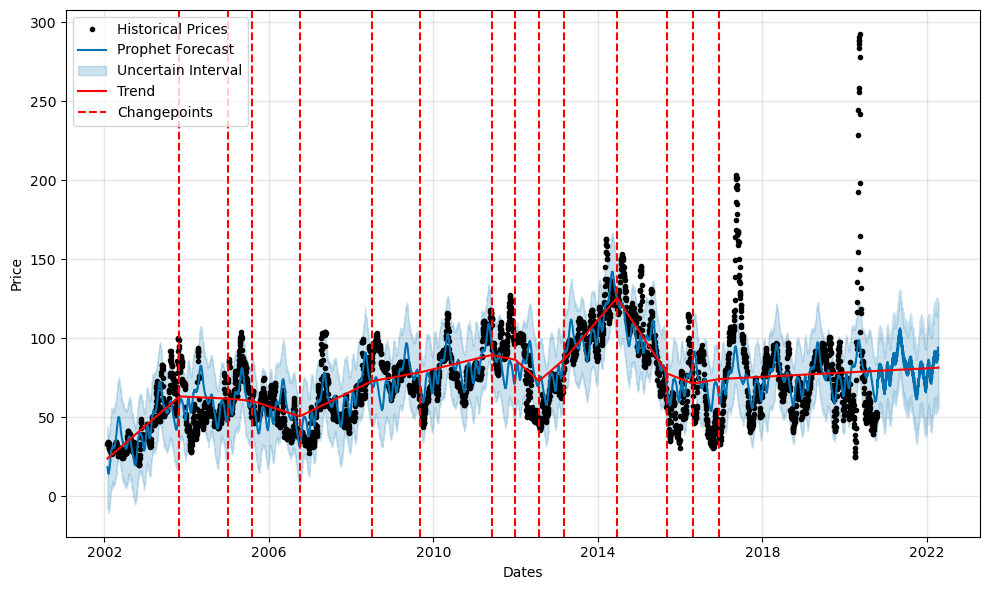

In [10]:
fig = US93_model_obj.plot(US93_forecast)
a = add_changepoints_to_plot(fig.gca(), US93_model_obj, US93_forecast)
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(["Historical Prices", "Prophet Forecast", "Uncertain Interval", "Trend", "Changepoints"],loc='upper left')